# Preprocessing and visualization of Dataset #1: Adults

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# 1. Load the datasets into Pandas dataframes
names1=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'over-50K']
dataset1_train = pd.read_csv('adult_train.csv', index_col=False, names=names1, sep=',\s', na_values=['?'], engine='python')
dataset1_test = pd.read_csv('adult_test.csv', index_col=False, names=names1, sep=',\s', na_values=['?'], engine='python')

print(dataset1_train.shape)

(32561, 15)


## Clean the data

In [4]:
# Remove instances with missing/invalid data entries
dataset1_train.dropna(axis=0, how='any', inplace=True)
print(dataset1_train.shape)

(30162, 15)


In [5]:
# Encode Over 50K as 1
dataset1_train['over-50K'] = dataset1_train['over-50K'].map({'>50K': 1, '<=50K': 0})

# Encode Male as 1
dataset1_train['sex'] = dataset1_train['sex'].map({'Male': 1, 'Female': 0})

In [6]:
print(dataset1_train['native-country'].describe()) 

count             30162
unique               41
top       United-States
freq              27504
Name: native-country, dtype: object


Since 91% of native-country data is US, we will categorize this column as "US" and "non-US".

In [7]:
# Encode US as 1 and non-US as 0
dataset1_train['native-country'] = np.where(dataset1_train['native-country']=='United-States', 1, 0)

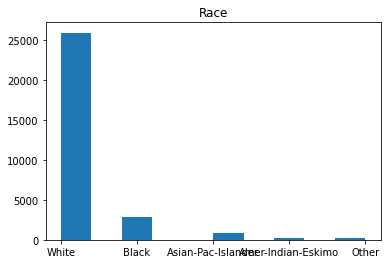

In [8]:
# Visualize race distribution
plt.hist(dataset1_train['race'], histtype='bar')
plt.title('Race')
plt.show()

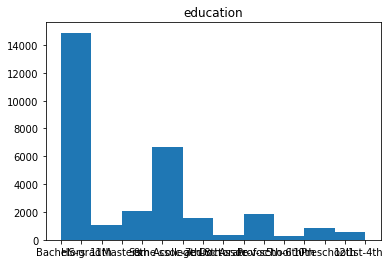

In [9]:
# Visualize education distribution
plt.hist(dataset1_train['education'], histtype='bar')
plt.title('education')
plt.show()

In [20]:
# Correlation
correlations = dataset1_train.corr(method="pearson")

                     age    fnlwgt  education-num       sex  capital-gain  \
age             1.000000 -0.076511       0.043526  0.081993      0.080154   
fnlwgt         -0.076511  1.000000      -0.044992  0.025362      0.000422   
education-num   0.043526 -0.044992       1.000000  0.006157      0.124416   
sex             0.081993  0.025362       0.006157  1.000000      0.048814   
capital-gain    0.080154  0.000422       0.124416  0.048814      1.000000   
capital-loss    0.060165 -0.009750       0.079646  0.047011     -0.032229   
hours-per-week  0.101599 -0.022886       0.152522  0.231268      0.080432   
native-country  0.016259 -0.083390       0.127207 -0.003006      0.012375   
over-50K        0.241998 -0.008957       0.335286  0.216699      0.221196   

                capital-loss  hours-per-week  native-country  over-50K  
age                 0.060165        0.101599        0.016259  0.241998  
fnlwgt             -0.009750       -0.022886       -0.083390 -0.008957  
education-

From the above correlations, we can interpret that 'fnlgwt' and 'native-country' are not relevant to predicting the salary as their correlation is below 0.09.

In [24]:
# Remove uncorrelated columns
dataset1_train = dataset1_train.drop(columns=['fnlwgt', 'native-country'])
dataset1_test = dataset1_test.drop(columns=['fnlwgt', 'native-country'])

(30162, 13)


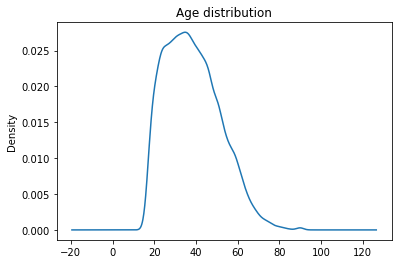

In [14]:
# Visualize age distribution
dataset1_train.age.plot(kind='kde')
plt.title('Age distribution')
plt.show()

## One-hot encoding

In [19]:
import category_encoders as ce

# Convert discrete variables into multiple variables using one-hot encoding
# Discrete columns: workclass, education, marital-status, occupation, relationship, sex, native-country
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'race', 'relationship'], use_cat_names=True)
train_encoded_1 = encoder.fit_transform(dataset1_train)
test_encoded_1 = encoder.transform(dataset1_test) 


/usr/local/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Preprocessing Dataset #2

## Import the data

In [14]:
import pandas as pd

# 1. Load the datasets into Pandas dataframes
names2=['A1-Time','A2','A3','A4','A5','A6','A7','A8','A9','LABEL']
dataset2 = pd.read_csv('shuttle_trn.csv', index_col=False, names=names2, sep=' ', engine='python')
print(dataset2)

       A1-Time  A2   A3  A4  A5  A6  A7  A8  A9  LABEL
0           50  21   77   0  28   0  27  48  22      2
1           55   0   92   0   0  26  36  92  56      4
2           53   0   82   0  52  -5  29  30   2      1
3           37   0   76   0  28  18  40  48   8      1
4           37   0   79   0  34 -26  43  46   2      1
...        ...  ..  ...  ..  ..  ..  ..  ..  ..    ...
43495       46   5   78   0  46   5  32  32   0      1
43496       37   0   79  -1  10   3  43  69  26      1
43497       48   0   78   3  46   0  30  32   2      1
43498       41   0   79   0  38 -25  38  40   2      1
43499       40  -3  100   0  38   0  61  62   2      1

[43500 rows x 10 columns]


## Clean the data

In [15]:
# Data is complete, i.e., no missing cells
# Attributes are undefined, therefore all will be kept and be given the same weight

## Visulization

In [16]:
# Visualizing data to have a better idea of the data
# Plotting frequency of different attribute values since there are only 9 (+ 1 for assigned labels)
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A1-Time')

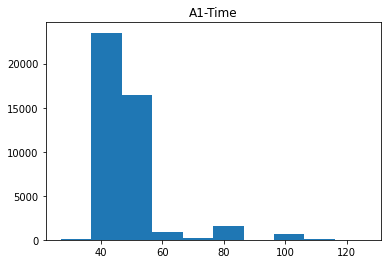

In [17]:
plt.hist(dataset2['A1-Time'], histtype='bar')
plt.title("A1-Time")

Text(0.5, 1.0, 'A2')

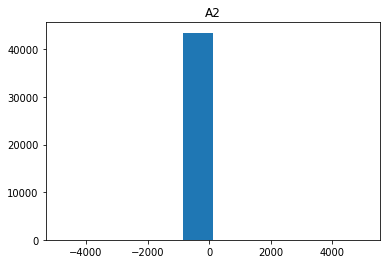

In [18]:
plt.hist(dataset2['A2'], histtype='bar')
plt.title("A2")

Text(0.5, 1.0, 'A3')

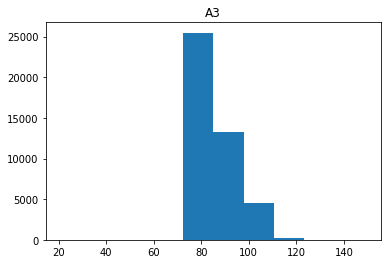

In [19]:
plt.hist(dataset2['A3'], histtype='bar')
plt.title("A3")

Text(0.5, 1.0, 'A4')

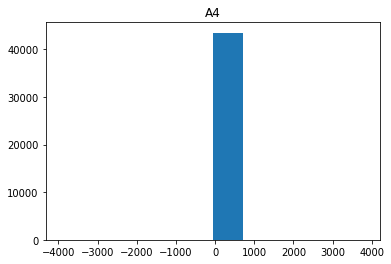

In [20]:
plt.hist(dataset2['A4'], histtype='bar')
plt.title("A4")

Text(0.5, 1.0, 'A5')

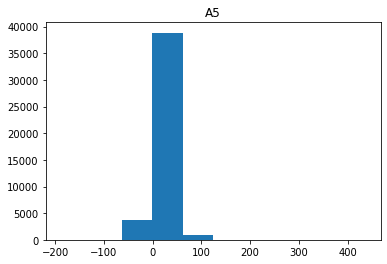

In [21]:
plt.hist(dataset2['A5'], histtype='bar')
plt.title("A5")

Text(0.5, 1.0, 'A6')

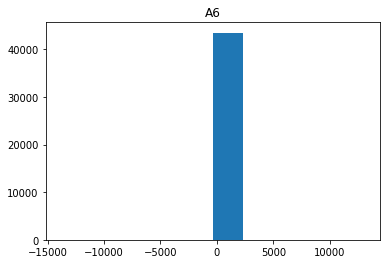

In [22]:
plt.hist(dataset2['A6'], histtype='bar')
plt.title("A6")

Text(0.5, 1.0, 'A7')

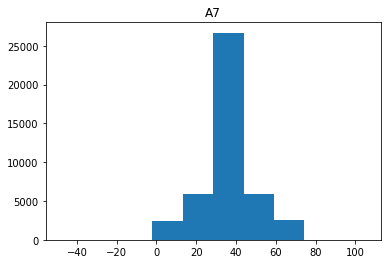

In [23]:
plt.hist(dataset2['A7'], histtype='bar')
plt.title("A7")

Text(0.5, 1.0, 'A8')

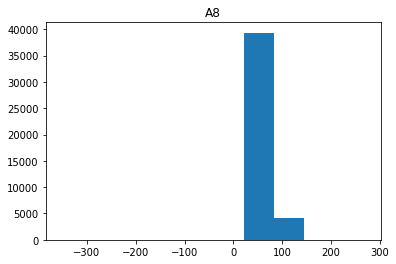

In [24]:
plt.hist(dataset2['A8'], histtype='bar')
plt.title("A8")

Text(0.5, 1.0, 'A9')

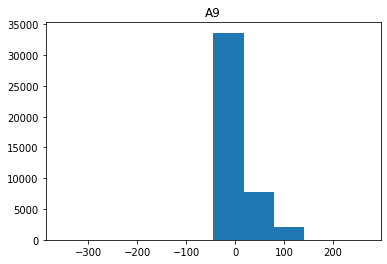

In [25]:
plt.hist(dataset2['A9'], histtype='bar')
plt.title("A9")

Text(0.5, 1.0, 'LABEL')

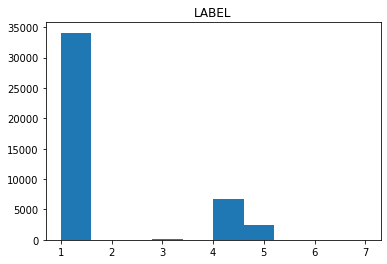

In [26]:
plt.hist(dataset2['LABEL'], histtype='bar')
plt.title("LABEL")

## One-hot coding

In [27]:
# No need for one-hot coding since all attributes and labels are numerical values